# **Análise Exploratória de Dados - Titanic Dataset**

## **Introdução**
O dataset do Titanic contém informações sobre os passageiros do famoso naufrágio. Este conjunto de dados é amplamente utilizado para explorar conceitos de análise de dados e aprendizado de máquina.

Nesta análise, vamos explorar o conjunto de dados para identificar padrões, realizar uma análise descritiva e visualizar os dados para responder perguntas importantes, como:
- Quais fatores influenciaram a sobrevivência dos passageiros?
- Qual o impacto de características como classe, idade, gênero e porto de embarque?

## **Objetivo**
- Realizar uma análise exploratória detalhada para identificar padrões no dataset.
- Visualizar as relações entre as variáveis e a taxa de sobrevivência dos passageiros.
- Fornecer insights acionáveis sobre os dados.

## **Importação das Bibliotecas e Carregamento dos Dados**

In [7]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

In [8]:
# Carregando o arquivo localmente
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

titanic_data = pd.read_csv(file_path)

Saving titanic-dataset.csv to titanic-dataset.csv


In [9]:
# Configuração do estilo do Seaborn
sns.set(style="whitegrid")

In [10]:
# Visualizando as primeiras linhas do dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **Exploração Inicial dos Dados**

In [11]:
# Informações gerais sobre o dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [12]:
# Estatísticas descritivas do dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
# Verificando valores ausentes
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


## **Análise Visual**



### 1. Distribuição de Sobrevivência

<ipython-input-14-af3bbf896e33>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_data, palette='viridis')


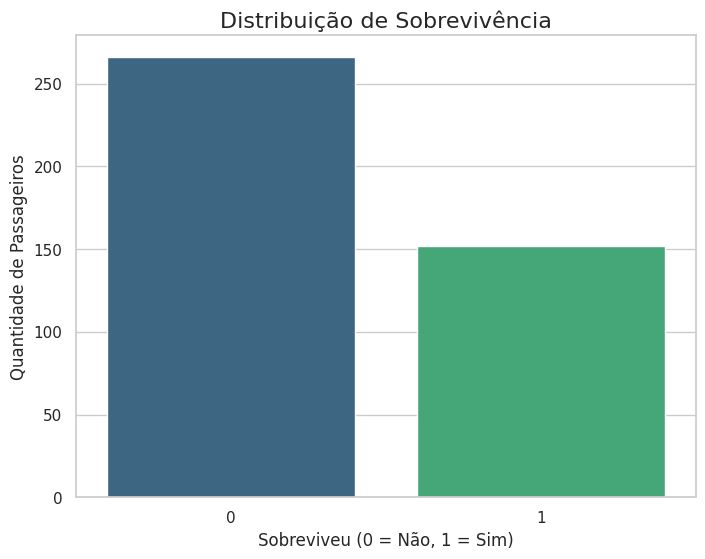

In [14]:
# Visualização da distribuição de sobreviventes
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=titanic_data, palette='viridis')
plt.title('Distribuição de Sobrevivência', fontsize=16)
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Quantidade de Passageiros', fontsize=12)
plt.show()

### 2. Sobrevivência por Classe de Ticket

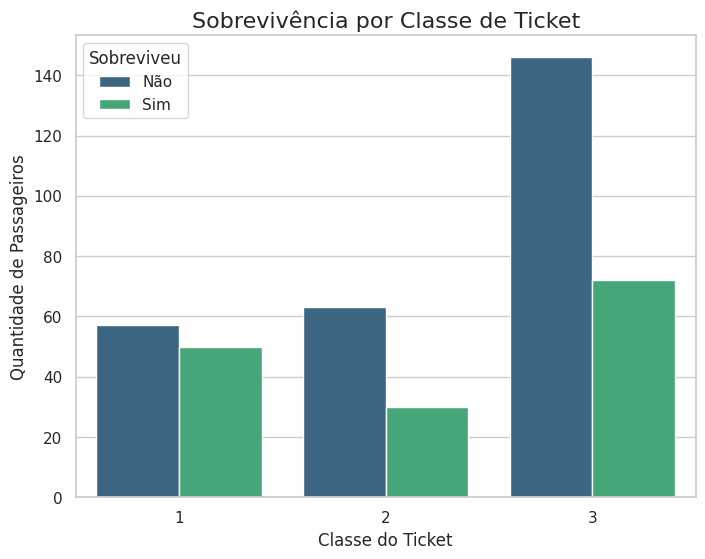

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='viridis')
plt.title('Sobrevivência por Classe de Ticket', fontsize=16)
plt.xlabel('Classe do Ticket', fontsize=12)
plt.ylabel('Quantidade de Passageiros', fontsize=12)
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

### 3. Distribuição de Idade por Sobrevivência

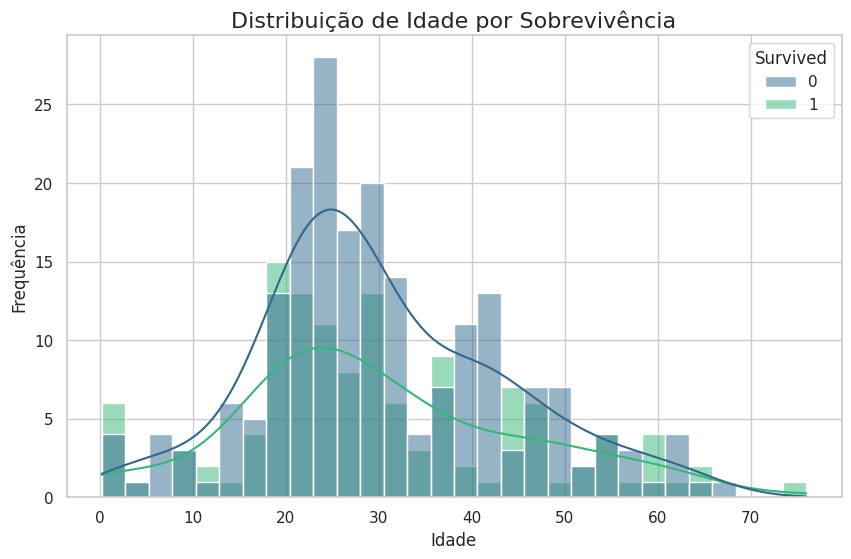

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', hue='Survived', kde=True, palette='viridis', bins=30)
plt.title('Distribuição de Idade por Sobrevivência', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

### 4. Sobrevivência por Gênero

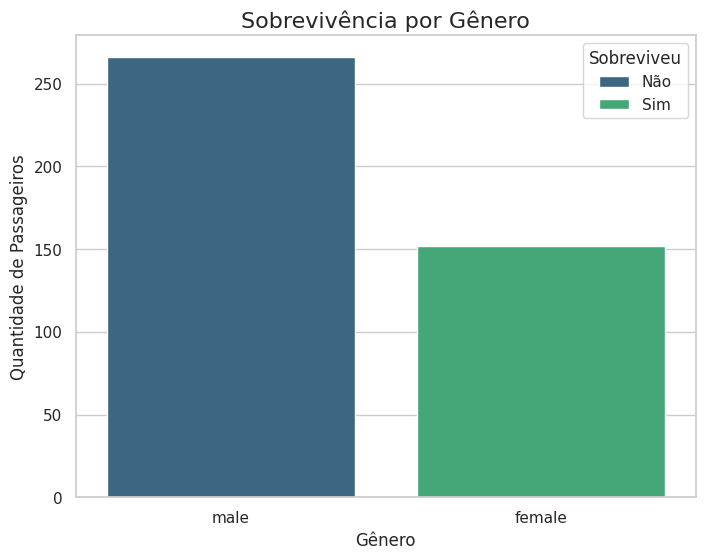

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_data, palette='viridis')
plt.title('Sobrevivência por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Quantidade de Passageiros', fontsize=12)
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

### 5. Sobrevivência por Porto de Embarque

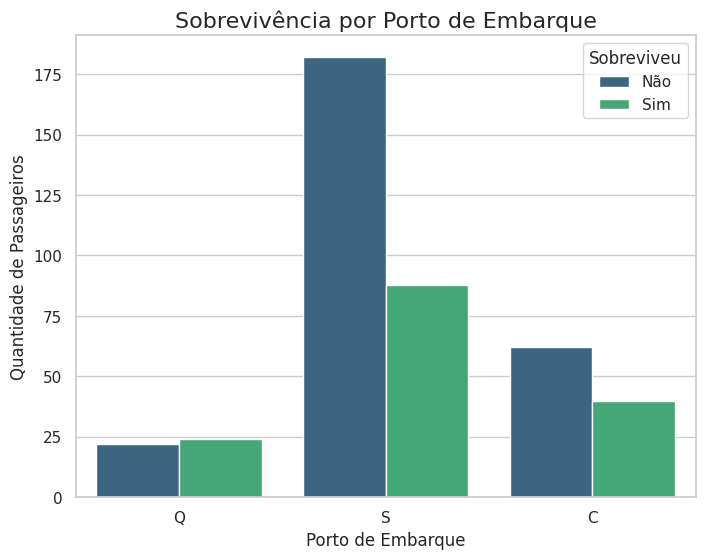

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=titanic_data, palette='viridis')
plt.title('Sobrevivência por Porto de Embarque', fontsize=16)
plt.xlabel('Porto de Embarque', fontsize=12)
plt.ylabel('Quantidade de Passageiros', fontsize=12)
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

## **Conclusões**


1. **Distribuição de Sobrevivência**:
   - Apenas 36% dos passageiros sobreviveram.

2. **Sobrevivência por Classe de Ticket**:
   - A maior taxa de sobrevivência foi entre os passageiros da 1ª classe.

3. **Distribuição de Idade**:
   - Crianças tiveram maior taxa de sobrevivência.

4. **Sobrevivência por Gênero**:
   - Mulheres apresentaram uma taxa de sobrevivência significativamente maior.

5. **Sobrevivência por Porto de Embarque**:
   - Passageiros que embarcaram em Cherbourg (C) tiveram maior taxa de sobrevivência.